# Customer Churn Project (Python)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
import os
df = pd.read_csv("churn.csv")
#dataset obtained from kaggle-  https://www.kaggle.com/blastchar/telco-customer-churn

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df.shape

(7043, 21)

In [36]:
#drop customerID
df.drop("customerID",axis=1, inplace=True)
df.shape

(7043, 20)

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Churn')

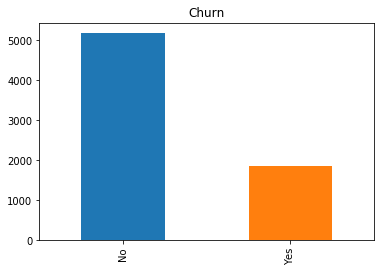

In [38]:
#plot churned distribution
df["Churn"].value_counts().plot('bar').set_title('Churn')

In [39]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [40]:
# Notice: TotalCharges didn't show up in the df.describe(), meaning it must have been entered as an object and not a float
df["TotalCharges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [41]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [42]:
#As expected the TotalCharges column is an object
#Turn it into a float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce').fillna(0, downcast='infer')

In [43]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [44]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [45]:
categorical_vars = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",
                   "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
                   "Contract", "PaperlessBilling","PaymentMethod"]
numerical_vars = ["tenure","MonthlyCharges","TotalCharges"]

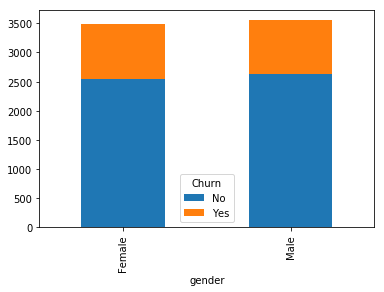

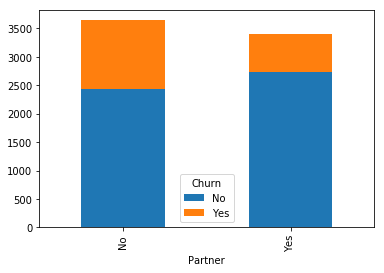

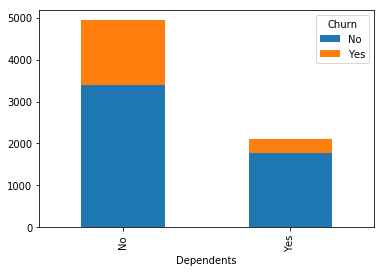

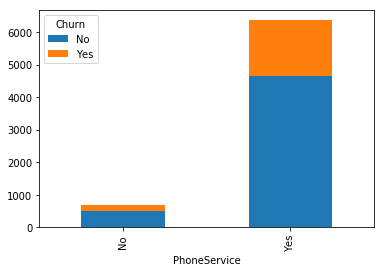

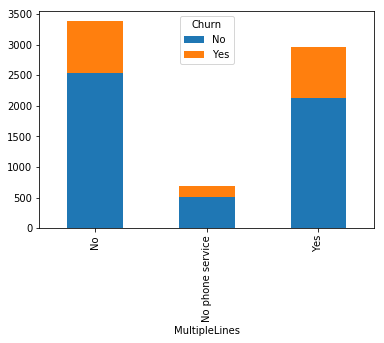

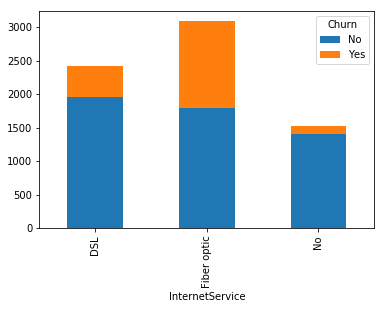

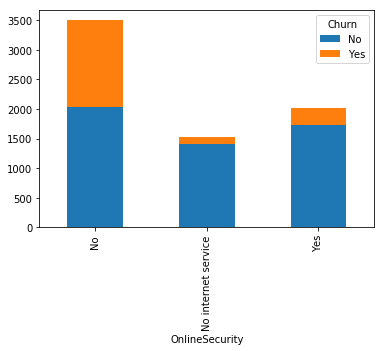

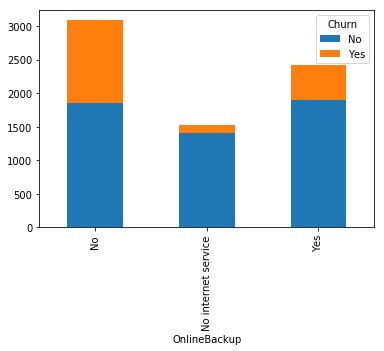

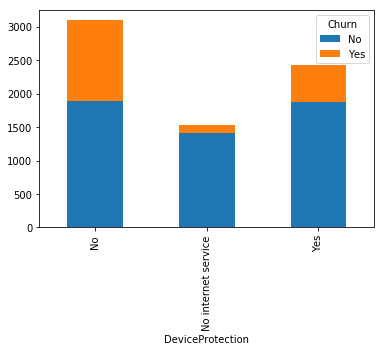

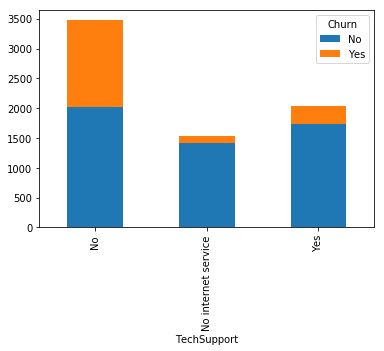

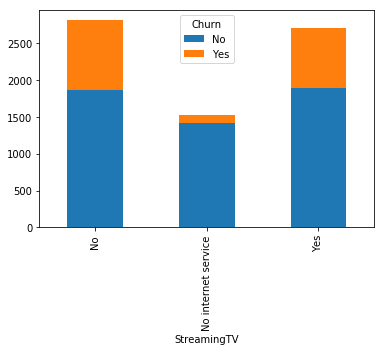

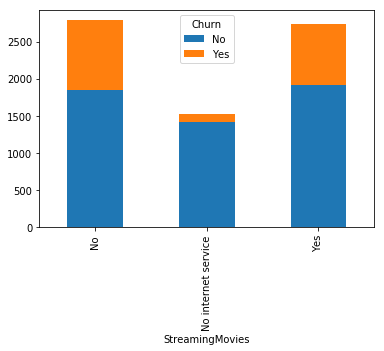

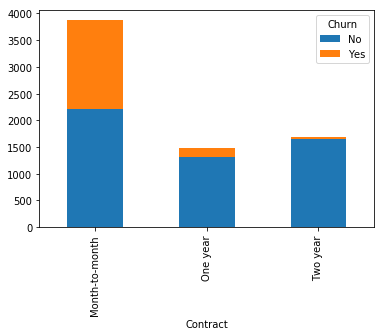

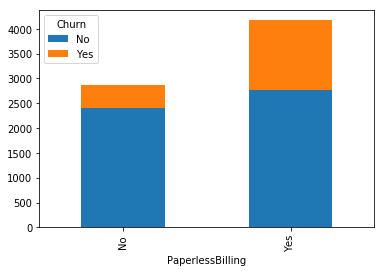

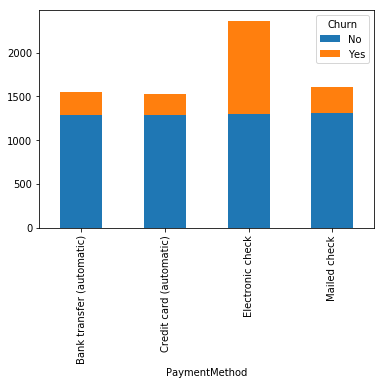

In [46]:
for i in categorical_vars:
    df.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True)    

Bases on the graphs above:
- Sex of customer seems irrelevant
- Customers without partners churn at a hugher rate than customers with partners
- Customers without depnendents churn at a higher rate
- Customers with phone service have higher churn rate
- Customers with fiber optic internet service have a higher churn rate than DSL
- Customers without online security have a much higher churn rate than those with online security
- Customers without online backup have a higher churn rate than those with
- Customers without device protection have a higher churn rate than those with device protection
- Customers without tech support have a higher churn rate than those with tech support
- Customers with month to month have highest churn rate. Customers with one year contract have a much lower churn rate, and customers with two year contracts have the very least churn rate
- Customers with paperless billing chun at a higher rate
- Customers with an electronic check payment method churn at the highest rate

In [47]:
#change yes/no to 0/1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
#separate X and y
y = df["Churn"]
X = df.drop("Churn", axis=1)

In [48]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
#standardize numerical variables
scaler = preprocessing.StandardScaler()
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])

C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Boom\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
#cpnvert categorical variables into dummy variables (drop_first=True) to avoid multicollinearity
X = pd.get_dummies(X, columns=categorical_vars,drop_first=True)

In [51]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992611,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.172165,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958066,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.193672,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.938874,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Naive Bayes Classifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [53]:
#guassian classifier
gnb = GaussianNB()
#train the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
#create predictions
y_pred = gnb.predict(X_test)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6621717530163236


Naive Bayes only had a 66% accuracy.

## Gradient Boosting Classifier

In [56]:
#running gbc with default parameters, no parameter tuning
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [57]:
y_pred = gbc.predict(X_test)

In [58]:
gbc.score(X_test,y_test)

0.8076650106458482

Gradient Boosting did much better than Naive Bayes. Now let's see if parameter tuning can improve accuracy.

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1105
           1       0.55      0.63      0.59       304

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.82      0.81      0.81      1409



In [61]:
#find which learning rate is best
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
train_results = []
test_results = []
for i in learning_rates:
   gbc = GradientBoostingClassifier(learning_rate=i)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

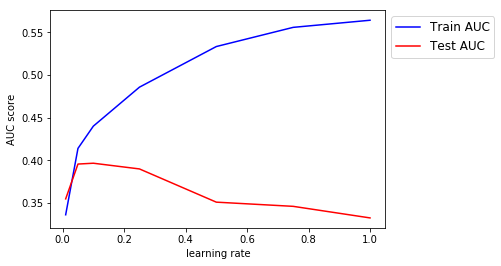

In [62]:
plt.plot(learning_rates, train_results,color='blue' , label="Train AUC")
plt.plot(learning_rates, test_results, color='red', label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
# 0.1 is the best learning rate

In [63]:
#find which n_estimators is best
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   gbc = GradientBoostingClassifier(n_estimators=estimator)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

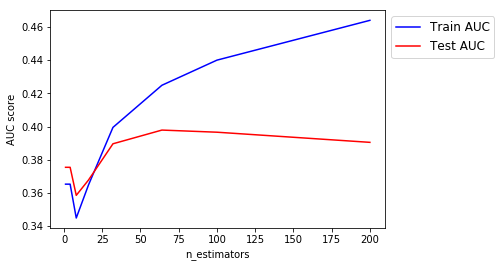

In [64]:
plt.plot(n_estimators, train_results, color='blue', label="Train AUC")
plt.plot(n_estimators, test_results, color='red', label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
# 64 is best

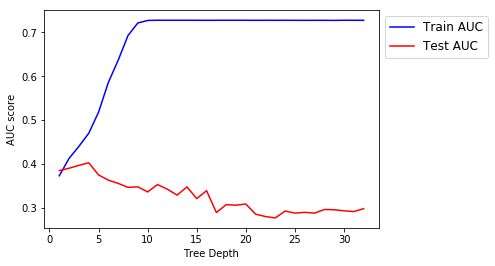

In [66]:
#find optimal max depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   gbc = GradientBoostingClassifier(max_depth=max_depth)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

plt.plot(max_depths, train_results, color='blue', label="Train AUC")
plt.plot(max_depths, test_results, color="red", label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("Tree Depth")
plt.show()

In [ ]:
# tree depth of 4 seems best

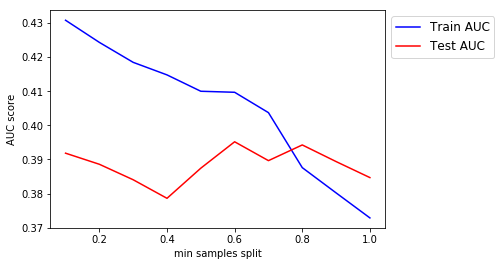

In [67]:
#find optimal min samples split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   gbc = GradientBoostingClassifier(min_samples_split=min_samples_split)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

plt.plot(min_samples_splits, train_results, color="blue", label="Train AUC")
plt.plot(min_samples_splits, test_results, color="red", label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
#min samples split best at 0.6 

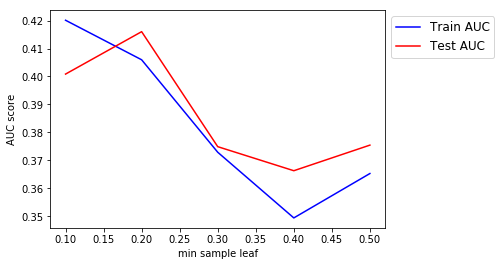

In [68]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   gbc = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

plt.plot(min_samples_leafs, train_results, color="blue", label="Train AUC")
plt.plot(min_samples_leafs, test_results, color="red", label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("min sample leaf")
plt.show()

In [ ]:
#min sample leaf of .20 is best

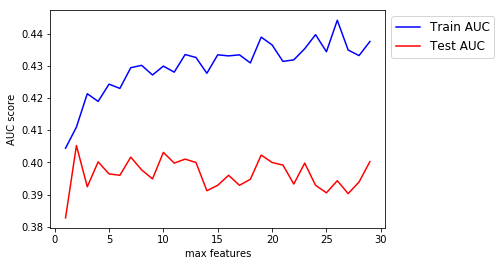

In [70]:
#find optimal max features
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   gbc = GradientBoostingClassifier(max_features=max_feature)
   gbc.fit(X_train, y_train)
   train_pred = gbc.predict(X_train)
   precision, recall, thresholds = precision_recall_curve(y_train, train_pred)
   pr_auc = auc(precision, recall)
   train_results.append(pr_auc)
   y_pred = gbc.predict(X_test)
   precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
   pr_auc = auc(precision, recall)
   test_results.append(pr_auc)

plt.plot(max_features, train_results, color="blue", label="Train AUC")
plt.plot(max_features, test_results, color="red", label="Test AUC")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()

In [83]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=64,
                                 max_depth=4,min_samples_leaf=0.2,max_features=2, min_samples_split=0.6)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
gbc.score(X_test,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1189
           1       0.43      0.69      0.53       220

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.68      0.76      0.71      1409
weighted avg       0.86      0.81      0.83      1409



In [84]:
print(gbc.score(X_test,y_test))

0.8105039034776437


Parameter tuning slightly improved model accuracy.

In [74]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(precision, recall)
print("pr auc:", pr_auc)

pr auc: 0.383289465133899
